# Facial Emotion Recognition Project

### Import Packages and Libraries

In [ ]:
# import the required image preprocessing functions

!pip install livelossplot==0.5.2
!pip install keras
!pip install keras_vggface
!pip uninstall --yes h5py
!pip install pandas
!pip install scikit_image
!pip install keras_applications
!pip install h5py
from tensorflow.keras import datasets, layers, models
from keras import applications

import cv2 as cv
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow import keras

import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image

# imports for reproducibility
import tensorflow as tf
import random
import pandas as pd
from subprocess import check_output

from scipy import ndimage
from keras.preprocessing.image import array_to_img

%matplotlib inline

# init the models
# resnet_model = resnet50.ResNet50(weights='imagenet')

import seaborn as sns
# import utils
import os, sys
from IPython.display import display
from IPython.display import Image as _Imgdis
from PIL import Image
import numpy as np
from time import time
from time import sleep

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, TensorBoard, ModelCheckpoint
from tensorflow.keras.utils import plot_model

from IPython.display import SVG, Image
from livelossplot import PlotLossesKeras
from keras.regularizers import l2
from keras.layers import GaussianNoise

import numpy as np
import pandas as pd
from tensorflow.python.lib.io import file_io
from skimage.transform import resize
from keras import backend as K
# from keras.utils import to_categorical
from keras_vggface.vggface import VGGFace
from keras.models import Model
from keras.layers import Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.callbacks import TensorBoard, LearningRateScheduler, ReduceLROnPlateau, EarlyStopping, Callback
import h5py # For saving the model
#below import doesn't work
from keras_vggface.vggface import VGGFace
import h5py

Uninstalling h5py-3.1.0:
  Successfully uninstalled h5py-3.1.0
     |████████████████████████████████| 51kB 6.0MB/s 
     |████████████████████████████████| 4.1MB 32.9MB/s 
ERROR: tensorflow 2.5.0 has requirement h5py~=3.1.0, but you'll have h5py 3.3.0 which is incompatible.


### Download and prepare the facialEmotionExpression dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

from google.colab import drive
import os

# Mount Google Drive
drive.mount('/drive', force_remount=True)

# Location of Zip File
drive_path = '/drive/MyDrive/Human Emotions & Gestures Project/Face/facialEmotionExpression.zip'
local_path = '/content'

# Copy the zip file and move it up one level (AKA out of the drive folder)
!cp '{drive_path}' .

# Navigate to the copied file and unzip it quietly
os.chdir(local_path)
!unzip -q 'facialEmotionExpression.zip'

94707712/94694792 [==============================] - 2s 0us/step


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#Init the model, og=48
image_size=48
resnet_model = VGGFace(
    model       = 'resnet50',
    include_top = False,
    weights     = 'vggface',
    input_shape = (197, 197, 3))

# Freeze all the layers
for layer in resnet_model.layers[:]:
    layer.trainable = True

# each folder contains three subfolders in accordance with the number of classes
train_dir = './facialEmotionExpression/train'
validation_dir = './facialEmotionExpression/test'

In [ ]:
def create_model():
  model = Sequential()
  model.add(resnet_model)
  model.add(Flatten())
  model.add(BatchNormalization())
  model.add(Dense(1024))
  model.add(Activation('relu'))
  model.add(Dropout(0.5))
  model.add(Dense(7, activation='softmax'))
  return model

model = create_model()

In [ ]:
# Load the normalized images
train_datagen = ImageDataGenerator(rescale=1./255,
                                  #  rotation_range = 45,
                                   width_shift_range=0.25,
                                   height_shift_range=0.25,
                                  #  brightness_range=[0.75,1.25],
                                  #  zoom_range=[0.75,1.25]
                                   )
validation_datagen = ImageDataGenerator(rescale=1./255)

# Change the batchsize according to your system RAM
train_batchsize = 100
val_batchsize = 10

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(197, 197),
        batch_size=train_batchsize,
        class_mode='categorical')

# Data generator for validation data
validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(197, 197),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False)

Found 28708 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


Above, you can see that the output of every Conv2D and MaxPooling2D layer is a 3D tensor of shape (height, width, channels). The width and height dimensions tend to shrink as you go deeper in the network. The number of output channels for each Conv2D layer is controlled by the first argument (e.g., 32 or 64). Typically,  as the width and height shrink, you can afford (computationally) to add more output channels in each Conv2D layer.

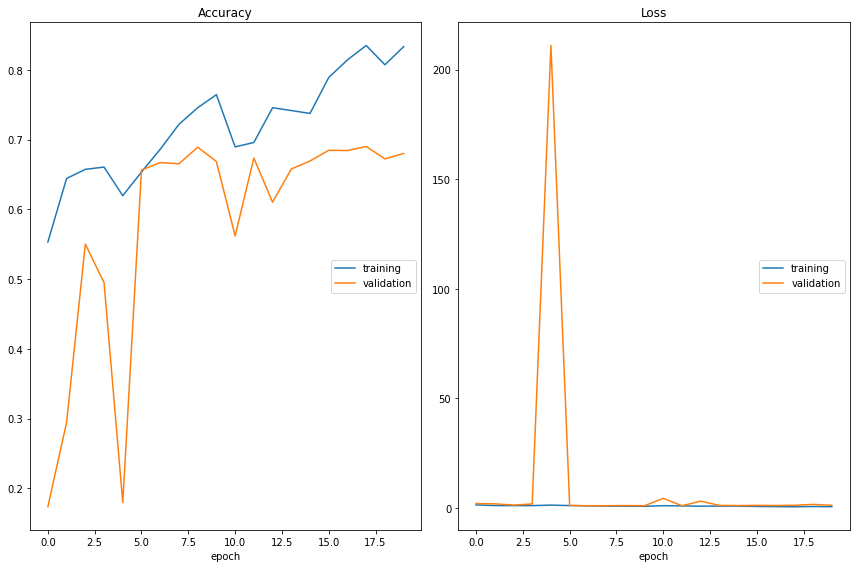

Accuracy
	training         	 (min:    0.553, max:    0.835, cur:    0.833)
	validation       	 (min:    0.174, max:    0.690, cur:    0.680)
Loss
	training         	 (min:    0.456, max:    1.291, cur:    0.469)
	validation       	 (min:    0.910, max:  211.060, cur:    1.119)

Epoch 00020: val_acc did not improve from 0.69003


In [ ]:
#SAVING THE MODEL AS AN HDF5 FILE FOR EASY LOADING INTO FUSED!

# Configure the model for training
opt = Adam(learning_rate=1e-4)
lr_reducer = ReduceLROnPlateau(monitor='val_acc', factor=0.9, patience=3)
# early_stopper = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=6, mode='auto')
# checkpointer = ModelCheckpoint('/content/gdrive/My Drive/Colab Notebooks/Emotion Recognition/Model/weights.hd5', monitor='val_loss', verbose=1, save_best_only=True)

# Create and train a new model instance.
model = create_model()

checkpointer = ModelCheckpoint('/content/drive/MyDrive/Human Emotions & Gestures Project/VggFace_Possible_Final_Models/Shifting', monitor='val_acc', verbose=1, save_best_only=True)
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['acc'])

# Train the model
history = model.fit(
      train_generator,
      steps_per_epoch=
      train_generator.samples/train_generator.batch_size,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=
      validation_generator.samples/validation_generator.batch_size,
      callbacks=[PlotLossesKeras(), checkpointer, lr_reducer],
      verbose=1)

# Save the entire model to a HDF5 file.
# The '.h5' extension indicates that the model should be saved to HDF5.
model.save('/content/drive/MyDrive/Human Emotions & Gestures Project/newFused/newShiftVggPretrain.h5')

### Visualize Model Results

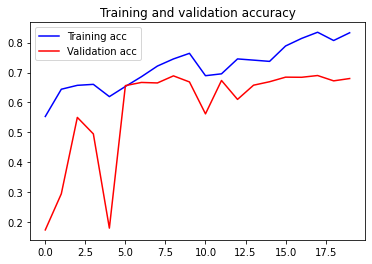

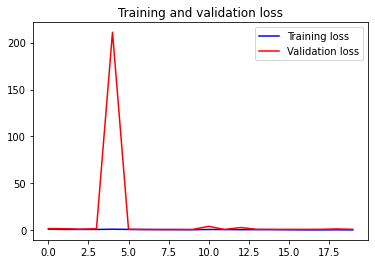

In [ ]:
# Utility function for plotting of the model results
def visualize_results(history):
    # Plot the accuracy and loss curves
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(acc))
    plt.plot(epochs, acc, 'b', label='Training acc')
    plt.plot(epochs, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.figure()
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

# Run the function to illustrate accuracy and loss
visualize_results(history)